<a href="https://colab.research.google.com/github/rishav-ish/MachineLearning/blob/master/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Set classification using perceptron

## Importing Require Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Our Data

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header = None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As you can see we don't have any null value in our dataset, and we have 150 samples with 4 features or dimensions

In [14]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df[4].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: 4, dtype: int64

we have 3 target class for labelling, as given above
<li>Iris_versicolor</li>
<li>Iris-setosa</li>
<li>Iris-virginica</li>

<br>

For understanding purpose we will be using first 100 samples of our dataset that comprises of Iris-versicolor and Iris-setosa only, both are 50 and 50 samples so our dataset are well balanced.

And also for visulaization of our separation boundary easily we will be using just two feature sepal length and petal length so that we don't have to go in dimensional reduction concept for now

In [0]:
X = df.iloc[:100,[0,2]].values              #converting into numpy  array using values
y = df.iloc[:100,-1].values

Let's label our y_data / target data to 1 and -1,
1 for Iris_versicolor
-1 for Iris-virginica

In [0]:
y = np.where(y=='Iris-setosa', 1 , -1)

let's plot our y to see our target value dataset

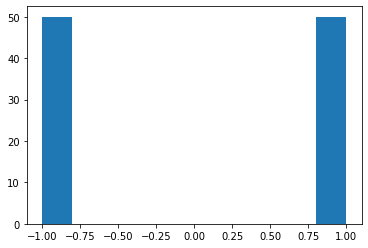

In [29]:
_ = plt.hist(y)                              #you can see that our data is well balanced
plt.show()

## Creating Perceptron Model

In [0]:
class Perceptron:

  def __init__(self, learning_rate = 0.01, epoch = 50, random_state = 42):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.random_state = random_state

  def net_input(self,X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

  def fit(self,X,y):
    random = np.random.RandomState(self.random_state)
    self.w_ = random.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])

    self.errors_ = []

    for _ in range(self.epoch):
      errors = 0
      for xi, target in zip(X,y):
        update = self.learning_rate * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

## Visualizing our data

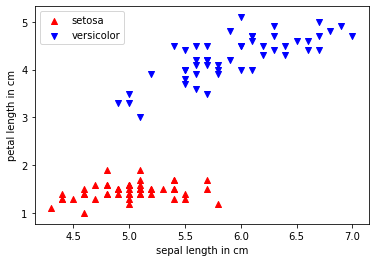

In [31]:
_  = plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = '^', label = 'setosa')
_ = plt.scatter(X[50:,0], X[50:,1], color = 'blue', marker = 'v', label = 'versicolor')
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend(loc = 'upper left')
plt.show()

## Training our Model

In [41]:
model = Perceptron(epoch = 10)
model.fit(X,y)

So our model have been trained let see the error happening per iteration

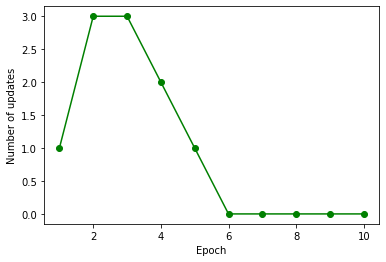

In [42]:
plt.plot(range(1,len(model.errors_) + 1), model.errors_, marker = 'o', color = 'green')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

## Visualizing the Decision Boundary

In [0]:
from matplotlib.colors import ListedColormap

In [0]:
def plot_decision_regions(X,y, classifier, resolution = 0.02):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1 , X[:,1].max() + 1
  xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution)
                          )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y==cl, 0], y = X[y==cl,1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

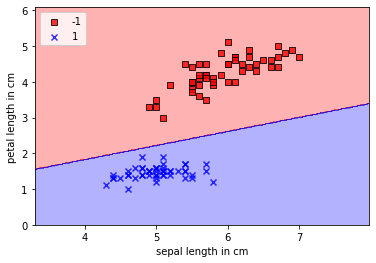

In [45]:
plot_decision_regions(X,y,model)
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend(loc = 'upper left')
plt.show()